In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
spotify = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HSE/spotify.csv')
spotify.head()

,Unnamed: 0,artist,track,album,album_type,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,stream,duration_min
0,0,Gorillaz,Feel Good Inc.,Demon Days,album,0.818,0.705,6,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,1040234854,3.710667
1,1,Gorillaz,Rhinestone Eyes,Plastic Beach,album,0.676,0.703,8,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,310083733,3.336217
2,2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,0.695,0.923,1,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,63063467,3.585833
3,3,Gorillaz,On Melancholy Hill,Plastic Beach,album,0.689,0.739,2,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,434663559,3.897783
4,4,Gorillaz,Clint Eastwood,Gorillaz,album,0.663,0.694,10,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,617259738,5.682000


### **Часть 3: Проверка гипотез**

В связи с тем, что альбомы (а также отдельные треки, входящие в них) и синглы имеют разные виды продвижения, можем предположить, что на число стримов влияет данный параметр ("album_type"). Чаще всего альбомы имеют большее продвижение среди слушателей, чем синглы, поэтому также предположим, что у треков, входящих в альбомы, число стримов будет выше.

Влияние типа альбома на число стримов будем проверять с помощью одного из статистических тестов, а предположение о более высоких значениях целевой переменной у альбомных треков - с помощью визуализации.

Проверка гипотезы: число стримов у треков, входящих в альбом, и треков, выпущенных синглом, различается.

```
H_0: Число стримов (stream) для треков, входящих в альбом = число стримов (stream) для треков, выпущенных синглом
H_1: Число стримов (stream) для треков, входящих в альбом ≠ число стримов (stream) для треков, выпущенных синглом
alpha = 0.05
```

In [4]:
album = spotify[spotify['album_type']=='album']
single = spotify[spotify['album_type']=='single']

Чтобы понять, какой статистический тест нам нужно использовать для проверки гипотезы, проверим наши данные на нормальность с помощью критерия Шапиро — Уилка, а также сравним их дисперсии с помощью критерия Левене.

In [5]:
alpha = 0.05
shapiro_test_album = st.shapiro(album['stream'])
print(shapiro_test_album)
if shapiro_test_album.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о нормальном распределении данных')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Данные распределены нормально')

ShapiroResult(statistic=np.float64(0.5661743990747901), pvalue=np.float64(1.3226678648552306e-101))
Отвергаем нулевую гипотезу о нормальном распределении данных


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:586: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 13312.
  res = hypotest_fun_out(*samples, **kwds)


In [6]:
shapiro_test_single = st.shapiro(single['stream'])
print(shapiro_test_single)
if shapiro_test_single.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о нормальном распределении данных')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Данные распределены нормально')

ShapiroResult(statistic=np.float64(0.5072123576654208), pvalue=np.float64(3.945023009314876e-78))
Отвергаем нулевую гипотезу о нормальном распределении данных


In [7]:
levene = st.levene(album['stream'], single['stream'])
print(levene)
if levene.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о равенстве дисперсий')
else:
    print('Не получилось отвергнуть нулевую гипотезу. Дисперсии в двух выборках не имеют значимых различий')

LeveneResult(statistic=np.float64(102.4185896144263), pvalue=np.float64(5.2128504286125e-24))
Отвергаем нулевую гипотезу о равенстве дисперсий


Оценка критериев показала, что наши данные не имеют нормального распределения, а их дисперсии не равны, значит, нам нужно использовать непараметрический тест - возьмем критерий Манна-Уитни.

In [8]:
results = st.mannwhitneyu(album['stream'], single['stream'])
print(results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу о равенстве числа стримов')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

1.3807501635363662e-123
Отвергаем нулевую гипотезу о равенстве числа стримов


Критерий Манна-Уитни подтвердил наше предположение о влияние типа альбома на число стримов. Теперь с помощью визуализации посмотрим, действительно ли у альбомных треков число стримов выше.

<ipython-input-9-56d90040b7d0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(spotify, x='stream', y='album_type', palette='Dark2')


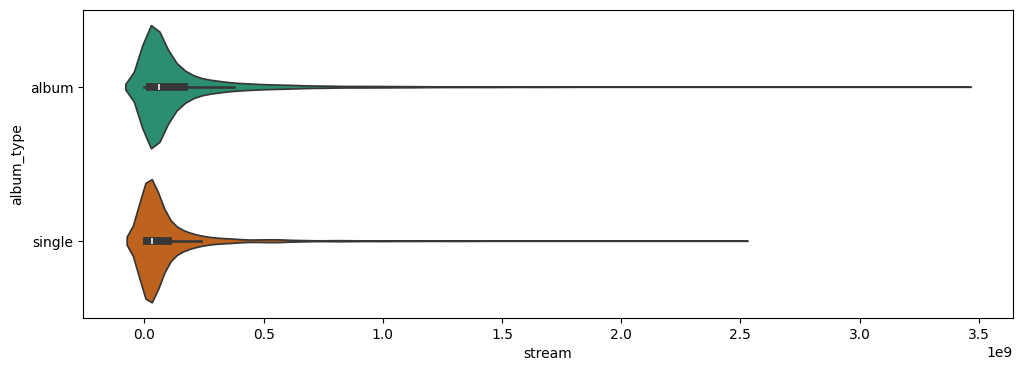

In [9]:
plt.figure(figsize=(12,4))
sns.violinplot(spotify, x='stream', y='album_type', palette='Dark2')
plt.show()

In [12]:
album['stream'].describe()

,stream
count,1.331200e+04
mean,1.579841e+08
std,2.677421e+08
min,1.669100e+04
25%,2.327385e+07
50%,6.124073e+07
75%,1.643355e+08
max,3.386520e+09


In [13]:
single['stream'].describe()

,stream
count,4.656000e+03
mean,1.028792e+08
std,2.014803e+08
min,6.574000e+03
25%,9.244702e+06
50%,3.330787e+07
75%,1.004736e+08
max,2.456205e+09


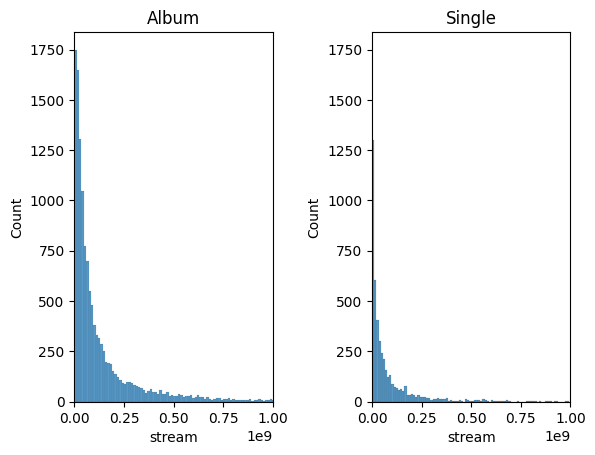

In [10]:
plt.subplot(1, 2, 1)
sns.histplot(data=album, x="stream")
plt.title('Album')
plt.xlim(0, 1000000000)

y1 = plt.gca().get_ylim()[1]

plt.subplot(1, 2, 2)
sns.histplot(data=single, x="stream")
plt.title('Single')
plt.xlim(0, 1000000000)

plt.ylim(0, y1)

plt.subplots_adjust(wspace=0.5)

plt.show()

Мы видим, что у альбомных треков медианное значение числа стримов выше, чем у синглов, также у них шире диапазон значений для целевой переменной. А гистограммы помогают понять, что при увеличении числа стримов количество треков у синглов снижается быстрее, чем у альбомных треков.

**Вывод:** Критерий Манна-Уитни подтвердил наше предположение о том, что на число стримов влияет тип альбома (альбомный трек или сингл). А визуализация показала, что мы можем говорить про более высокие показатели числа стримов у альбомных треков.